In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Data Set

In [2]:
#reading Dataset
retail = pd.read_csv("Online+Retail.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

# parse date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

### Data quality check and cleaning

In [3]:
# Let's look top 5 rows
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#shape Check
print(retail.shape)

(541909, 8)


In [5]:
print(retail.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [6]:
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [7]:
#Na Handling
retail.isnull().sum()*100/retail.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
#dropping the na cells
retail.dropna(inplace=True)

In [9]:
#Sanity check
print(retail.shape)
retail.isnull().sum()

(406829, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

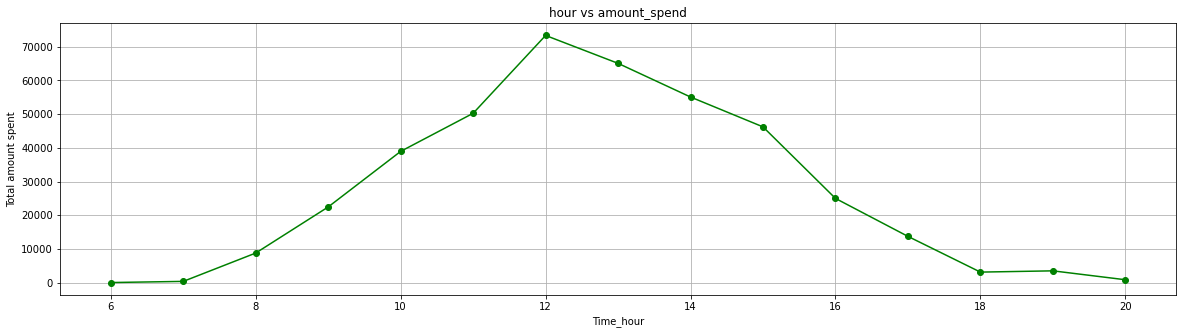

In [10]:
plt.rcParams["figure.figsize"] = (20,5)
data = retail.InvoiceDate.dt.hour.value_counts()

plt.plot(data.sort_index().index.tolist() , data.sort_index().values.tolist(), 'o-', color="green")
plt.xlabel('Time_hour')
plt.ylabel('Total amount spent')
plt.title('hour vs amount_spend')
plt.grid()
plt.show()

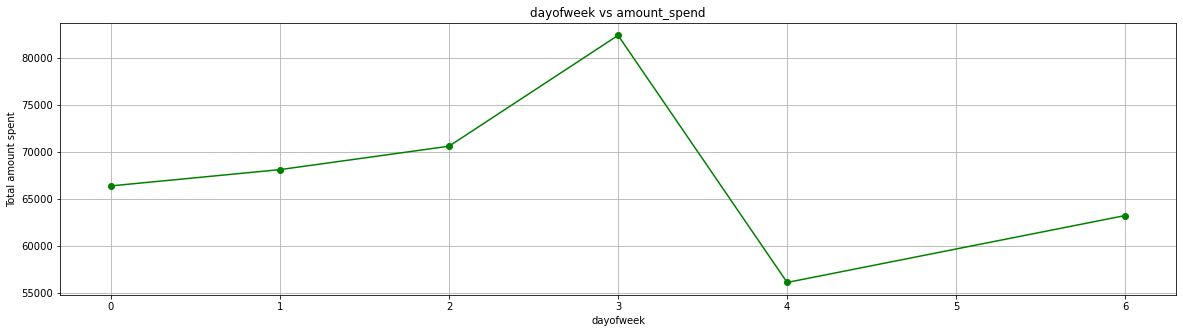

In [28]:
plt.rcParams["figure.figsize"] = (20,5)
data = retail.InvoiceDate.dt.dayofweek.value_counts()

plt.plot(data.sort_index().index.tolist() , data.sort_index().values.tolist(), 'o-', color="green")
plt.xlabel('dayofweek')
plt.ylabel('Total amount spent')
plt.title('dayofweek vs amount_spend')
plt.grid()
plt.show()

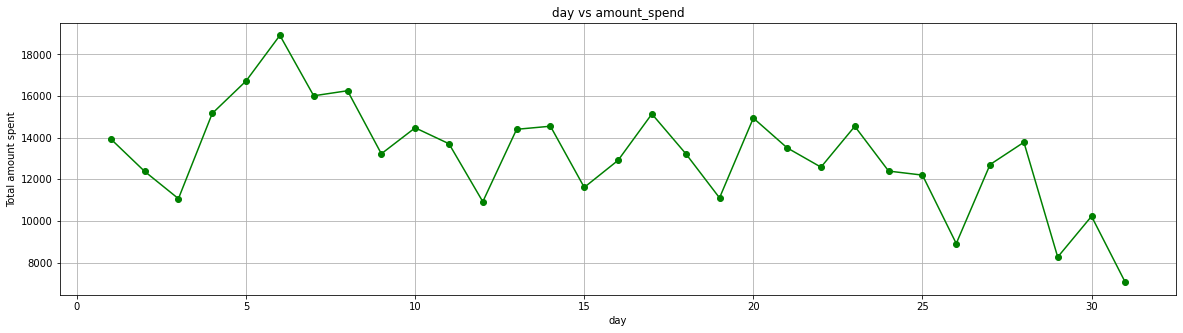

In [29]:
plt.rcParams["figure.figsize"] = (20,5)
data = retail.InvoiceDate.dt.day.value_counts()

plt.plot(data.sort_index().index.tolist() , data.sort_index().values.tolist(), 'o-', color="green")
plt.xlabel('day')
plt.ylabel('Total amount spent')
plt.title('day vs amount_spend')
plt.grid()
plt.show()

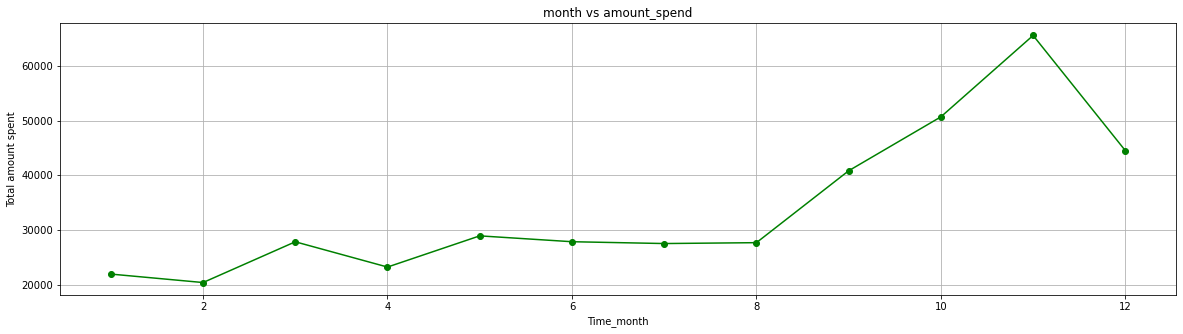

In [13]:
plt.rcParams["figure.figsize"] = (20,5)
data = retail.InvoiceDate.dt.month.value_counts()

plt.plot(data.sort_index().index.tolist() , data.sort_index().values.tolist(), 'o-', color="green")
plt.xlabel('Time_month')
plt.ylabel('Total amount spent')
plt.title('month vs amount_spend')
plt.grid()
plt.show()

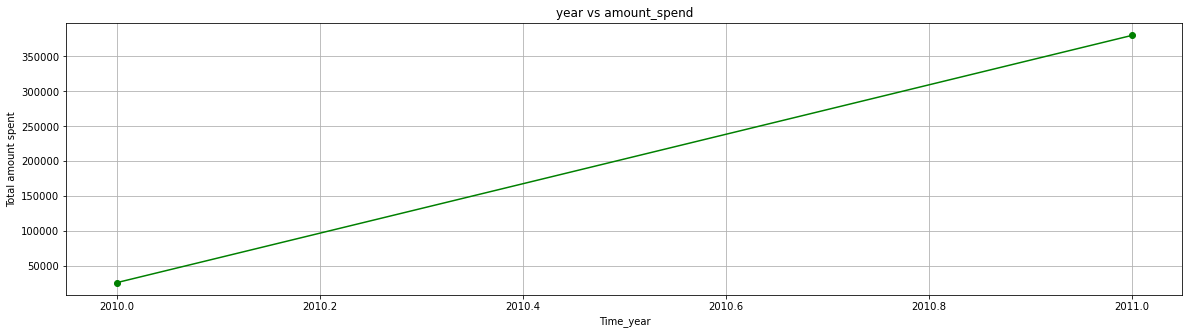

In [14]:
plt.rcParams["figure.figsize"] = (20,5)
data = retail.InvoiceDate.dt.year.value_counts()

plt.plot(data.sort_index().index.tolist() , data.sort_index().values.tolist(), 'o-', color="green")
plt.xlabel('Time_year')
plt.ylabel('Total amount spent')
plt.title('year vs amount_spend')
plt.grid()
plt.show()

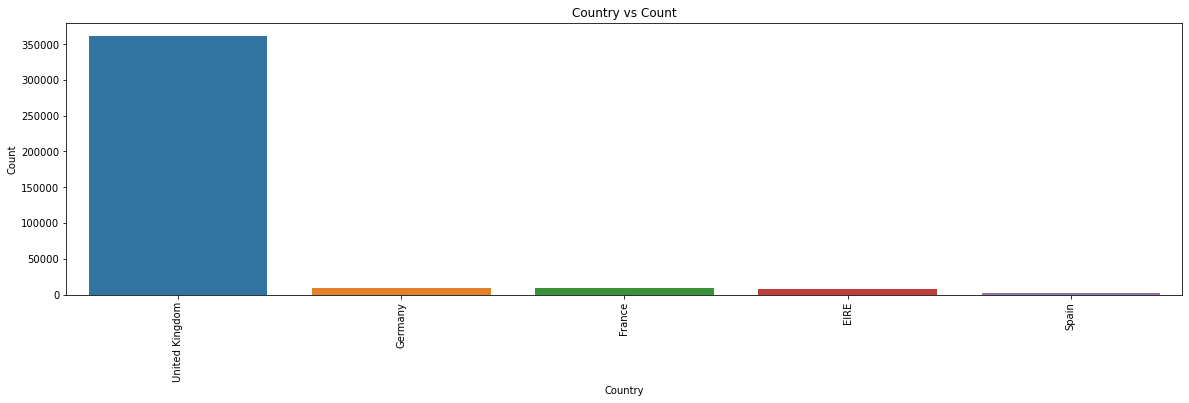

In [15]:
sns.countplot(data=retail,x='Country',order = pd.value_counts(retail['Country']).iloc[:5].index)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country vs Count')
plt.xticks(rotation=90)
plt.show()

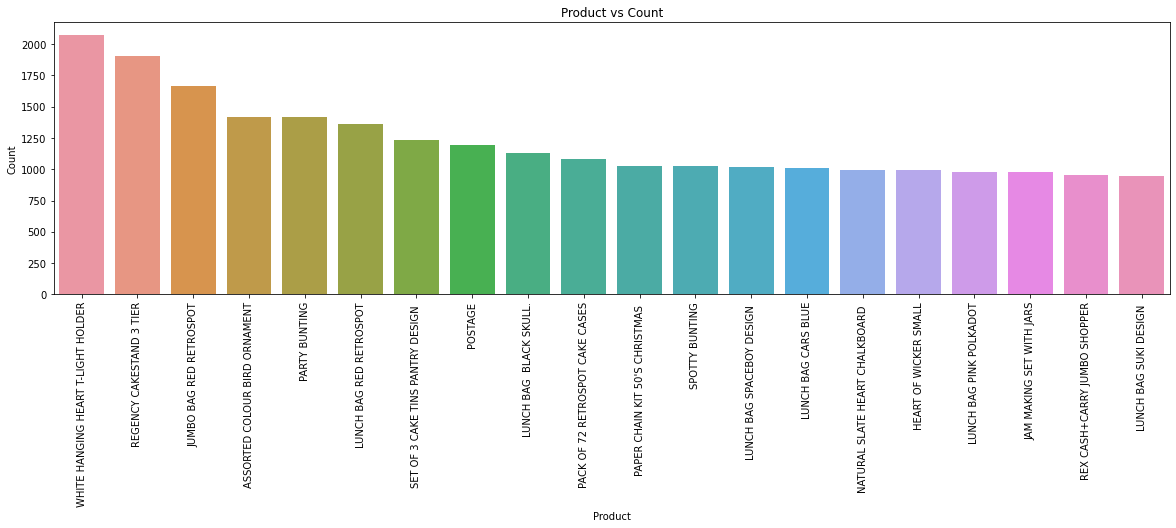

In [16]:
sns.countplot(data=retail,x='Description',order = pd.value_counts(retail['Description']).iloc[:20].index)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product vs Count')
plt.xticks(rotation=90)
plt.show()

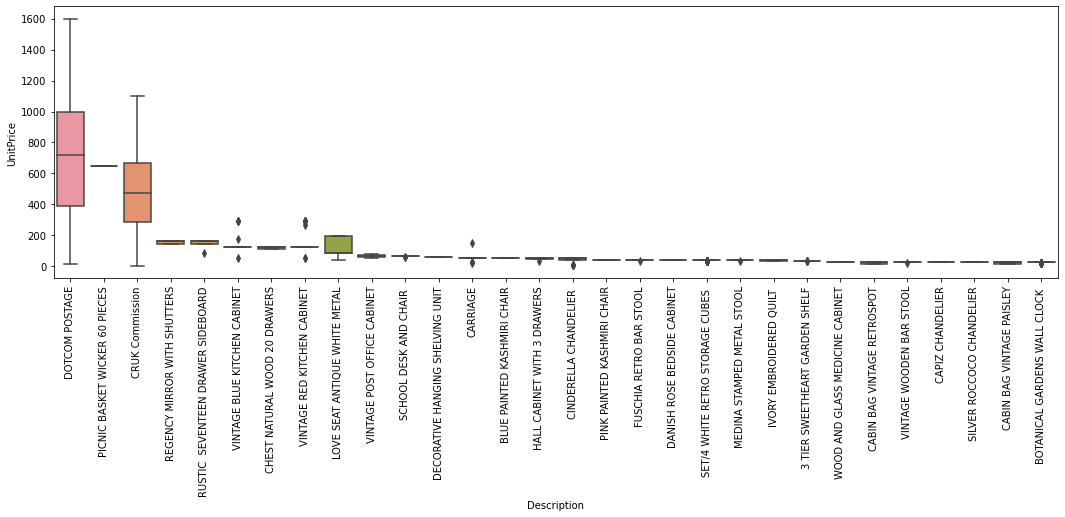

In [17]:
temp = retail.groupby(['Description'])['UnitPrice'].median().reset_index().sort_values(by='UnitPrice',ascending=False)
temp.rename(columns={'UnitPrice':'UnitPrice_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='UnitPrice',x='Description',data=pd.merge(temp,retail,on='Description'),order=temp['Description'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [18]:
retail['amount'] = retail.Quantity * retail.UnitPrice

In [19]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


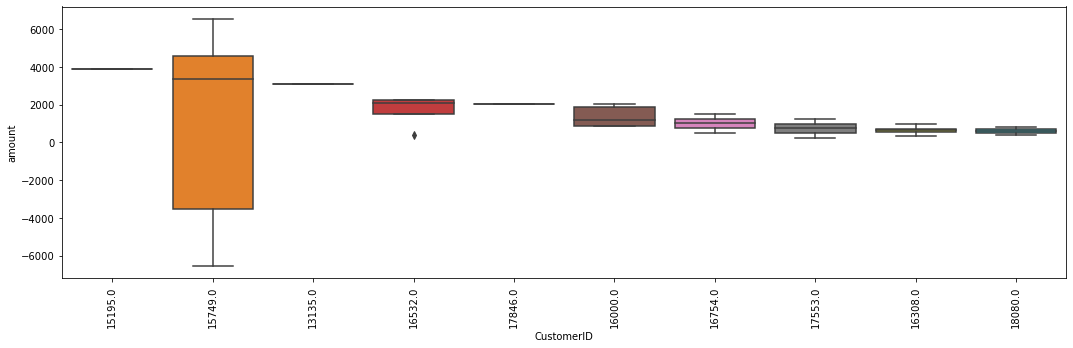

In [20]:
temp = retail.groupby(['CustomerID'])['amount'].median().reset_index().sort_values(by='amount',ascending=False)
temp.rename(columns={'amount':'UnitPrice_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='amount',x='CustomerID',data=pd.merge(temp,retail,on='CustomerID'),order=temp['CustomerID'].unique().tolist()[:10])
plt.xticks(rotation=90)
plt.show()

In [21]:
temp2 = retail.groupby(['CustomerID'])['amount'].mean().reset_index().sort_values(by='amount',ascending=False)
temp2.rename(columns={'amount':'amount_mean'},inplace=True)

temp3 = retail.groupby(['CustomerID'])['amount'].count().reset_index().sort_values(by='amount',ascending=False)
temp3.rename(columns={'amount':'no_of_products'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='CustomerID')
temp = pd.merge(temp,temp2,on='CustomerID')

temp3 = retail.groupby(['CustomerID'])['amount'].max().reset_index().sort_values(by='amount',ascending=False)
temp3.rename(columns={'amount':'max_amount'},inplace=True)

temp2 = retail.groupby(['CustomerID'])['amount'].min().reset_index().sort_values(by='amount',ascending=False)
temp2.rename(columns={'amount':'min_amount'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='CustomerID')
temp = pd.merge(temp,temp2,on='CustomerID')

# temp['amount_price_per_car'] = temp['amount_mean'] // temp['no_of_products']

del temp2
del temp3

In [22]:
temp.head()

,CustomerID,UnitPrice_median,amount_mean,no_of_products,min_amount,max_amount
0,15195.0,3861.0,3861.000000,1,3861.0,3861.0
1,15749.0,3380.0,1435.726667,15,-6539.4,6539.4
2,13135.0,3096.0,3096.000000,1,3096.0,3096.0
3,16532.0,2071.2,1687.200000,4,374.4,2232.0
4,17846.0,2033.1,2033.100000,1,2033.1,2033.1


In [23]:
temp.sort_values(by='no_of_products',ascending=False).head()

,CustomerID,UnitPrice_median,amount_mean,no_of_products,min_amount,max_amount
4125,17841.0,2.95,5.053336,7983,-39.95,349.50
1608,14911.0,16.80,22.458516,5903,-1687.17,1687.17
3572,14096.0,5.79,11.139023,5128,-1100.44,1599.26
4026,12748.0,3.30,6.262839,4642,-1829.84,850.50
4204,14606.0,2.50,4.210586,2782,-55.10,139.30


In [24]:
temp.sort_values(by='amount_mean',ascending=False).head()

,CustomerID,UnitPrice_median,amount_mean,no_of_products,min_amount,max_amount
0,15195.0,3861.0,3861.000000,1,3861.0,3861.0
2,13135.0,3096.0,3096.000000,1,3096.0,3096.0
4,17846.0,2033.1,2033.100000,1,2033.1,2033.1
3,16532.0,2071.2,1687.200000,4,374.4,2232.0
1,15749.0,3380.0,1435.726667,15,-6539.4,6539.4


In [25]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
temp = retail.groupby(['Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
temp.head()

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


In [27]:
retail.sort_values(by='UnitPrice',ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,-4287.63
